<a href="https://colab.research.google.com/github/SamaSamrin/Toyota-Cars-EDA/blob/main/TOYOTA_car_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("toyota.csv")
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

In [ ]:
df['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

# Pie Chart & Bar Plot for FUEL TYPE


---


**The Pie Chart**

**Pros:** represents the ratio of four fuel types more vibrantly and makes it easier to see

**Cons:** corresponding percentages may overlap (especially of "Other" and "Diesel")

---

**The Bar Plot**

**Pros:** presents the exact numbers of Fuel Types in the selected vehicles. Overlapping can be resolved easily with "rotate"

**Cons:** harder to show  percentages than pie chart

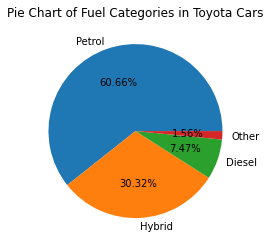

In [ ]:
plt.title("Pie Chart of Fuel Categories in Toyota Cars")
df['fuelType'].value_counts().plot(kind='pie', autopct="%1.2f%%")
plt.ylabel(" ")
plt.show(" ")

Text(0, 0.5, 'Number of Cars')

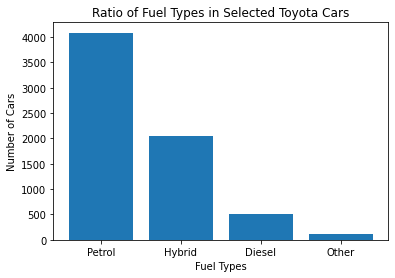

In [ ]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts())

df_fuelType_newindex = df_fuelType.reset_index()

df_fuelType_final = df_fuelType_newindex.rename(columns={"index":"fuelType", "fuelType":"Number of Cars"})

#display(df_fuelType_final)
plt.title("Ratio of Fuel Types in Selected Toyota Cars")
plt.bar(df_fuelType_final["fuelType"], df_fuelType_final["Number of Cars"])
plt.xlabel("Fuel Types")
plt.ylabel("Number of Cars")
#plt.show("") - displaying the graph twice

# Homework 3

## Scatter Plot

***Plot 1 Observations:***
The price and the mileage have an inversely proportional relationship, or a negative correlation. Lower mileage dictates newer status of the car, which can contribute to its higher price. Most of the cheapest cars have manual transmission, the most expensive ones are semi-autho and the mid-range ones have automatic transmission.

***Plot 2 Observations:***
Most of the newer models seem to be of higher price, so the year and the price values have a mildly significant positive correlation. The transmission type doesn't carry much weight in this plot, or it represents the same insights of Plot 1.

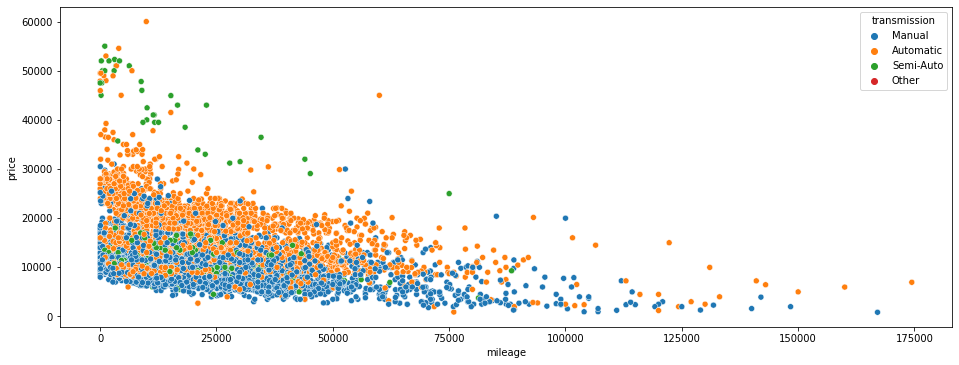

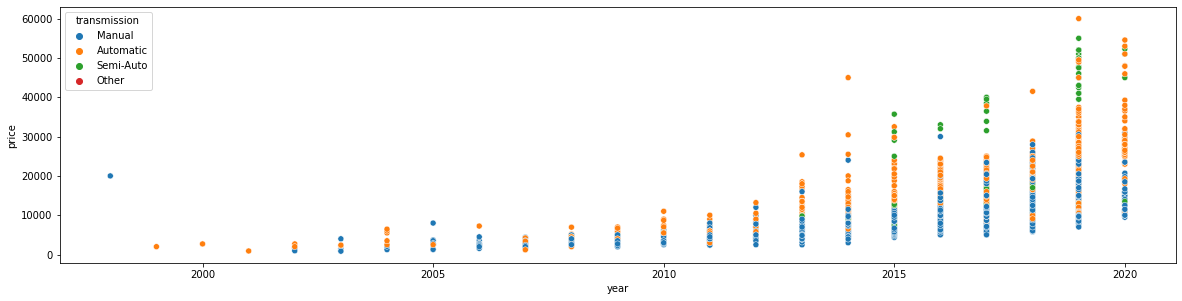

In [ ]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue="transmission")
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,1,2)
sns.scatterplot(x='year', y='price', data=df, hue="transmission")
plt.show()

## Regression Plot

**Plot 1** shows a **downward Trend Line** confirming the negative correlation and **Plot 2** shows an **upward Trend Line** confirming a positive correlation.

Due to the density of data points in Plot 1, their colors and edge colors have been altered.



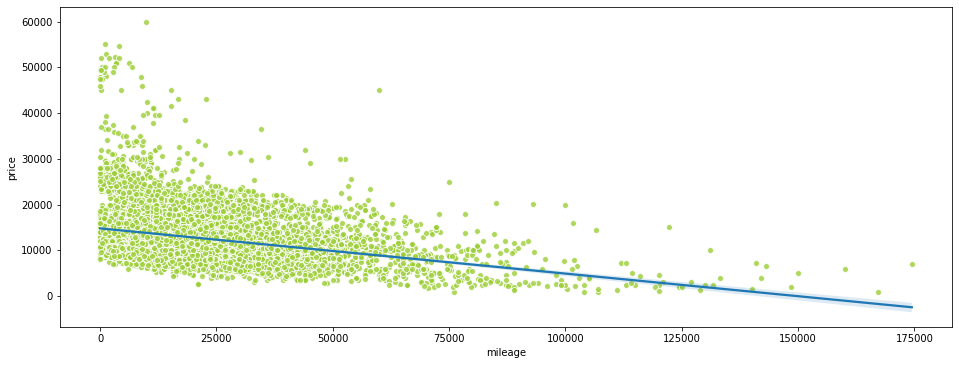

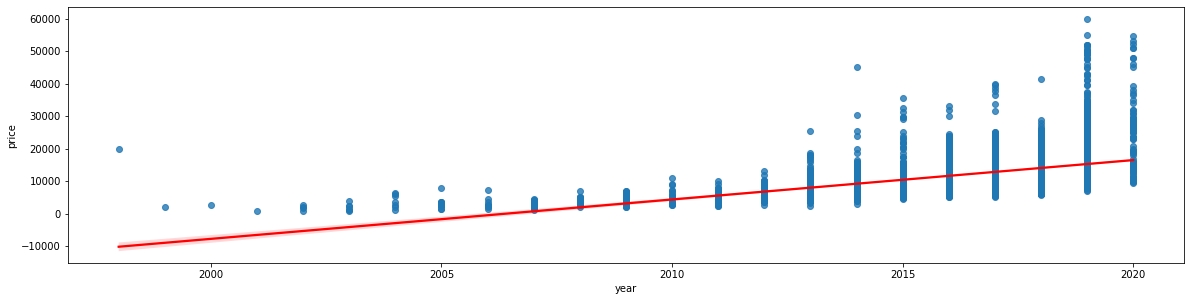

In [36]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={"color":"yellowgreen", "edgecolor":"white"})
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,1,2)
sns.regplot(x='year', y='price', data=df, line_kws={"color":"red"})
plt.show()

##Pair Plot

Hue doesn't seem to help any plot except **Year-Price** and **Mileage-Price**.

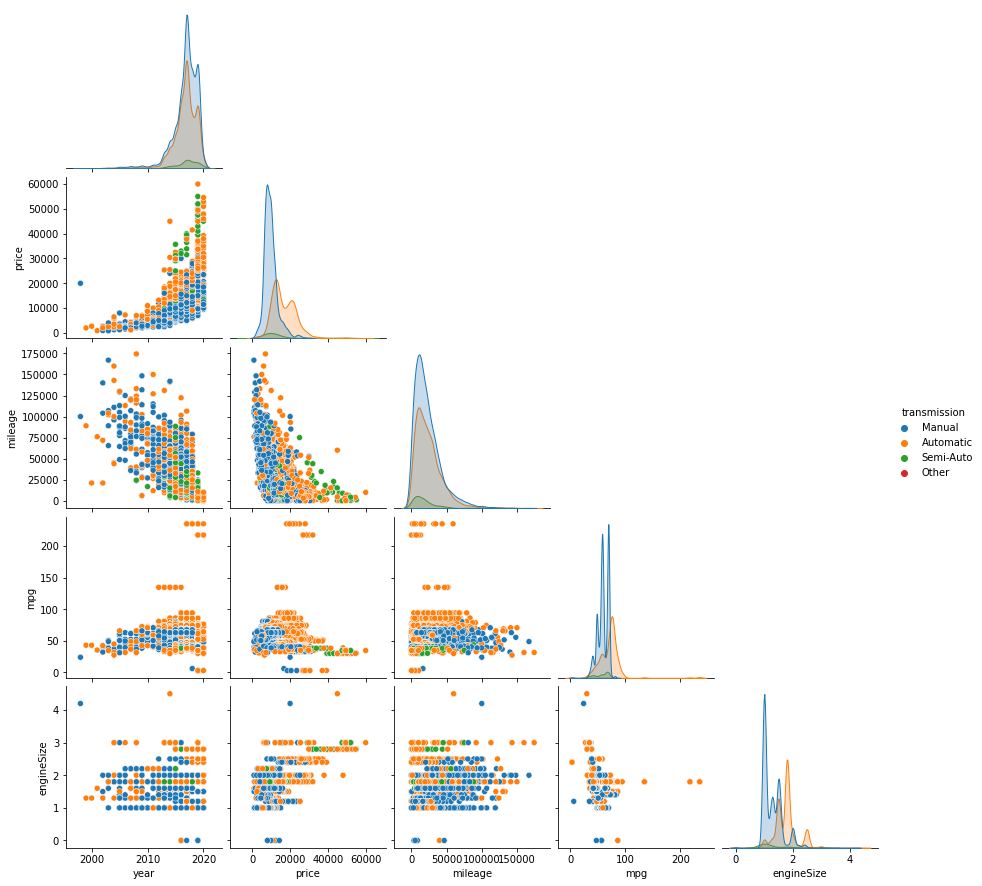

In [40]:
sns.pairplot(df, corner=True, hue="transmission",)
plt.show()